# Melbourne Housing price prediction
#### https://www.kaggle.com/anthonypino/melbourne-housing-market

In [168]:
!pip install filesplit

In [169]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Data Pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Regression algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Data Train-Test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

# Data Saving
import pickle

# Other
import datetime
from fsplit.filesplit import Filesplit
import os


In [170]:
data = pd.read_csv('Housing_Data.csv')
print(data.shape)
data.sample(10)

(34857, 21)


,Suburb,Address,Bedrooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
5415,Heidelberg Heights,2 Law St,2,h,675000.0,S,Fletchers,24/09/2016,10.5,3081.0,...,NaN,NaN,NaN,NaN,NaN,Banyule City Council,NaN,NaN,Eastern Metropolitan,2947.0
22683,Pascoe Vale,17B Pardy St,3,t,770000.0,PI,McGrath,23/09/2017,8.5,3044.0,...,NaN,NaN,NaN,NaN,NaN,Moreland City Council,NaN,NaN,Northern Metropolitan,7485.0
17956,Canterbury,11 Parlington St,4,h,3250000.0,VB,Jellis,12/8/2017,8.4,3126.0,...,2.0,3.0,855.0,NaN,NaN,Boroondara City Council,-37.82024,145.06172,Southern Metropolitan,3265.0
19970,Footscray,2/12 Eleanor St,2,t,NaN,SP,hockingstuart,3/9/2017,5.1,3011.0,...,1.0,1.0,NaN,84.0,2015.0,Maribyrnong City Council,-37.79089,144.88556,Western Metropolitan,7570.0
21922,Heidelberg West,3 Narvik Cr,3,h,845000.0,S,Purplebricks,19/08/2017,8.8,3081.0,...,1.0,2.0,NaN,100.0,1954.0,Banyule City Council,-37.74650,145.04002,Eastern Metropolitan,2674.0
2849,Canterbury,55 Warburton Rd,3,h,1385000.0,S,Jellis,18/06/2016,9.0,3126.0,...,1.0,1.0,444.0,NaN,1910.0,Boroondara City Council,-37.82600,145.07340,Southern Metropolitan,3265.0
13861,Viewbank,9 Rockaway Dr,4,h,1155000.0,PI,Fletchers,22/04/2017,13.8,3084.0,...,2.0,3.0,780.0,217.0,1950.0,Banyule City Council,-37.73080,145.09320,Eastern Metropolitan,2698.0
19206,Templestowe Lower,1/6 Union St,2,t,731000.0,S,Jellis,22/07/2017,12.4,3107.0,...,1.0,1.0,217.0,115.0,2005.0,Manningham City Council,-37.75671,145.11401,Eastern Metropolitan,5420.0
8601,Reservoir,1/15 Delaware St,3,h,600000.0,S,Ray,23/04/2016,11.2,3073.0,...,2.0,2.0,0.0,NaN,NaN,Darebin City Council,-37.72080,145.01480,Northern Metropolitan,21650.0
1049,Balwyn North,8 Kalonga Rd,4,h,NaN,PI,Noel,7/5/2016,9.2,3104.0,...,1.0,2.0,510.0,NaN,NaN,Boroondara City Council,-37.80320,145.10070,Southern Metropolitan,7809.0


# Exploratory data analysis

In [171]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,34857,351,Reservoir,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,34857,34009,5 Charles St,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bedrooms,34857.0,NaN,NaN,NaN,3.031012,0.969933,1.0,2.0,3.0,4.0,16.0
Type,34857,3,h,23980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,27247.0,NaN,NaN,NaN,1050173.344955,641467.130105,85000.0,635000.0,870000.0,1295000.0,11200000.0
Method,34857,9,S,19744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,34857,388,Jellis,3359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,34857,78,28/10/2017,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,34856.0,NaN,NaN,NaN,11.184929,6.788892,0.0,6.4,10.3,14.0,48.1
Postcode,34856.0,NaN,NaN,NaN,3116.062859,109.023903,3000.0,3051.0,3103.0,3156.0,3978.0


### Data Correction and Convertions

#### Remove any rows with false data. (When Year Built is greater than Sold Date)

In [172]:
date_format = "%d/%m/%Y"
today = datetime.datetime.now()
for index, row in data.iterrows():
    temp_date = datetime.datetime.strptime(row['Date'], date_format)
    if(row['YearBuilt'] > temp_date.year):
        data.drop(index, inplace=True)

#### Convert Sold Date into No. of Day from Sold Date

In [173]:
temp_data = []
in_data = data['Date'].tolist()
date_format = "%d/%m/%Y"
today = datetime.datetime.now()
for row in in_data:
    temp_date = datetime.datetime.strptime(row, date_format)
    delta = today - temp_date
    temp_data.append(delta.days)
data['DaysFromSale'] = temp_data

data.drop(labels='Date', axis=1, inplace=True)

#### Convert Year Built into Age of the property

In [174]:
temp_data = []
in_data = data['YearBuilt'].tolist()
date_format = "%d/%m/%Y"
today = datetime.datetime.now()
for row in in_data:
    if(np.isnan(row)):
        temp_data.append(np.NaN)
    else:
        temp_data.append(today.year - row)
data['Age'] = temp_data

data.drop(labels='YearBuilt', axis=1, inplace=True)

### Drop Unnecessary Columns

#### We can drop following colomns 

In [175]:
data.drop(labels='Address', axis=1, inplace=True)
data.drop(labels='Bedroom 2', axis=1, inplace=True)
data.drop(labels='SellerG', axis=1, inplace=True)
data.drop(labels='Propertycount', axis=1, inplace=True)

#### We can also drop 'Postcode','CouncilArea','RegionName' colomn because 'Suburb' can be used to identify a certain area

In [176]:
Suburb_Data = data[['Postcode','CouncilArea','Regionname']]
data.drop(labels='Postcode', axis=1, inplace=True)
data.drop(labels='CouncilArea', axis=1, inplace=True)
data.drop(labels='Regionname', axis=1, inplace=True)

#### Drop rows with null values and copy into tempory dataframe

In [177]:
Temp_data = data.dropna(how='any', axis=0, inplace=False)

#### Calculate correlation in tempory dataframe

In [178]:
correlation_matrix = Temp_data.corr()
correlation_matrix

,Bedrooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,DaysFromSale,Age
Bedrooms,1.000000,0.475230,0.276610,0.624807,0.401654,0.101118,0.607321,0.018487,0.083023,-0.231367,-0.007057
Price,0.475230,1.000000,-0.231226,0.463923,0.209488,0.058407,0.507529,-0.224189,0.212133,-0.019462,0.313729
Distance,0.276610,-0.231226,1.000000,0.122285,0.259461,0.138557,0.135637,-0.055371,0.163960,-0.366293,-0.313692
Bathroom,0.624807,0.463923,0.122285,1.000000,0.311620,0.075994,0.553787,-0.042061,0.109517,-0.133346,-0.192226
Car,0.401654,0.209488,0.259461,0.311620,1.000000,0.123523,0.317525,0.015557,0.035217,-0.182536,-0.139220
Landsize,0.101118,0.058407,0.138557,0.075994,0.123523,1.000000,0.083264,0.042429,-0.008205,-0.092572,-0.037719
BuildingArea,0.607321,0.507529,0.135637,0.553787,0.317525,0.083264,1.000000,-0.034430,0.097493,-0.105456,-0.059238
Lattitude,0.018487,-0.224189,-0.055371,-0.042061,0.015557,0.042429,-0.034430,1.000000,-0.345900,-0.054487,-0.100191
Longtitude,0.083023,0.212133,0.163960,0.109517,0.035217,-0.008205,0.097493,-0.345900,1.000000,-0.028550,0.026707
DaysFromSale,-0.231367,-0.019462,-0.366293,-0.133346,-0.182536,-0.092572,-0.105456,-0.054487,-0.028550,1.000000,0.121165


<AxesSubplot:>

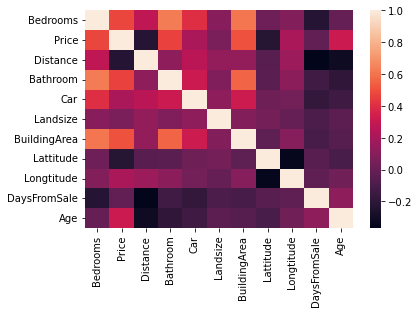

In [179]:
sns.heatmap(correlation_matrix)

#### We can also drop 'Landsize', 'DaysFromSale' since it very low correlation with price. 

In [180]:
data.drop(labels='Landsize', axis=1, inplace=True)
data.drop(labels='DaysFromSale', axis=1, inplace=True)

### Drop Rows with Missing Values

#### And now we can drop rows with null values (To retain more data)

In [181]:
data.drop_duplicates(inplace=True)
data.dropna(how='any', axis=0, inplace=True)

In [182]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,10046,323,Reservoir,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bedrooms,10046.0,NaN,NaN,NaN,3.112084,0.961778,1.0,3.0,3.0,4.0,12.0
Type,10046,3,h,7475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10046.0,NaN,NaN,NaN,1085522.175791,679949.174154,131000.0,635000.0,890000.0,1330000.0,9000000.0
Method,10046,5,S,6356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,10046.0,NaN,NaN,NaN,11.526369,7.054861,0.0,6.5,10.5,14.3,48.1
Bathroom,10046.0,NaN,NaN,NaN,1.657277,0.718039,1.0,1.0,2.0,2.0,9.0
Car,10046.0,NaN,NaN,NaN,1.706251,0.96922,0.0,1.0,2.0,2.0,10.0
BuildingArea,10046.0,NaN,NaN,NaN,150.340566,87.729059,0.0,100.0,133.0,181.0,3112.0
Lattitude,10046.0,NaN,NaN,NaN,-37.804559,0.093611,-38.1856,-37.859945,-37.798425,-37.747,-37.3978


### Removing Outliers of Numerical Data

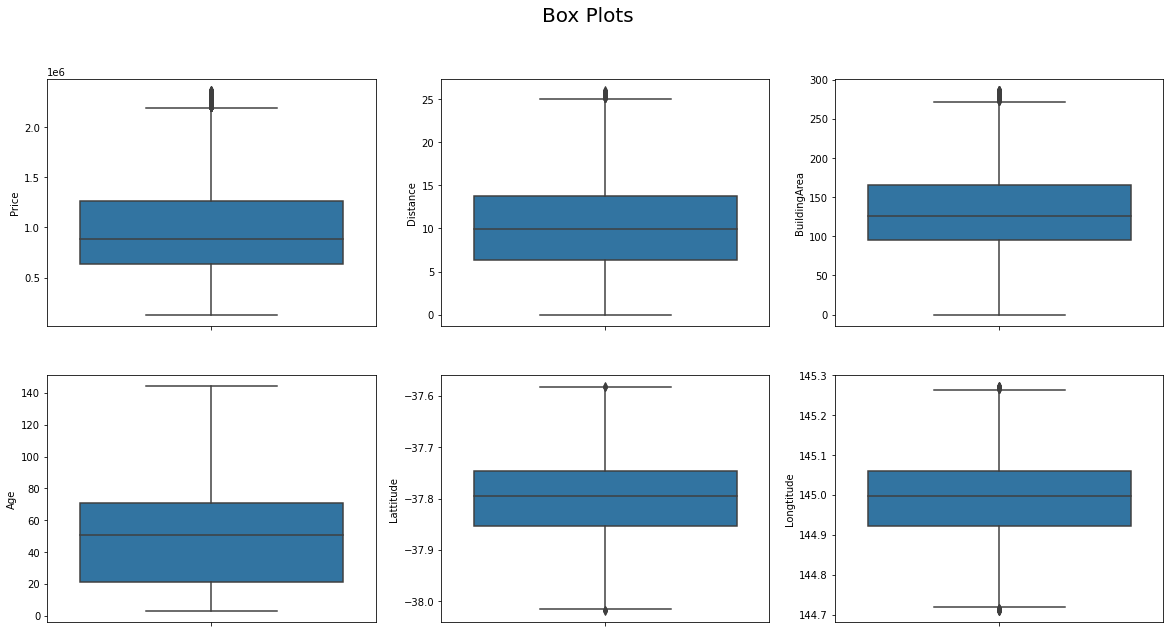

In [183]:
names = ['Price','Distance','BuildingArea','Age','Lattitude','Longtitude']
fig, axes = plt.subplots(2,3,figsize=(20,10))
plt.suptitle('Box Plots', fontsize=20)

for i,t in enumerate(names):
    Q1=data[t].quantile(0.25)
    Q3=data[t].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    data = data[data[t]<upper_bound]
    data = data[data[t]>=lower_bound]

for i,t in enumerate(names):
    sns.boxplot(y=t, data=data, orient='v', ax=axes[int(i/3),int(i%3)])


### Histogram Plot of Categorical Data

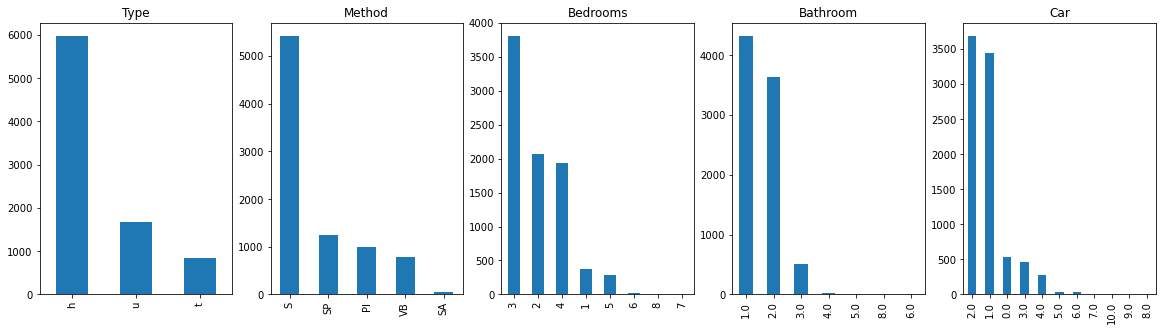

In [184]:
names = ['Type','Method','Bedrooms','Bathroom','Car']
fig, axes = plt.subplots(1,len(names),figsize=(20,5))
for i,t in enumerate(names):
    data[t].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].title.set_text(t)

In [185]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,8500,260,Reservoir,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bedrooms,8500.0,NaN,NaN,NaN,2.974471,0.903475,1.0,2.0,3.0,4.0,8.0
Type,8500,3,h,5983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,8500.0,NaN,NaN,NaN,985988.031882,452556.994965,131000.0,640000.0,880000.0,1262000.0,2371000.0
Method,8500,5,S,5426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,8500.0,NaN,NaN,NaN,10.345882,5.242511,0.0,6.3,9.9,13.8,26.1
Bathroom,8500.0,NaN,NaN,NaN,1.559059,0.627952,1.0,1.0,1.0,2.0,8.0
Car,8500.0,NaN,NaN,NaN,1.626588,0.926959,0.0,1.0,2.0,2.0,10.0
BuildingArea,8500.0,NaN,NaN,NaN,133.023061,54.702191,0.0,95.0,126.0,166.0,287.0
Lattitude,8500.0,NaN,NaN,NaN,-37.799115,0.07983,-38.01908,-37.853777,-37.7944,-37.745407,-37.58168


# Pre-possessing Data

In [186]:
Suburb_LE = preprocessing.LabelEncoder()
data['Suburb_LE'] = Suburb_LE.fit_transform(data['Suburb'])
data.drop(labels='Suburb', axis=1, inplace=True)

In [187]:
Type_LE = preprocessing.LabelEncoder()
data['Type_LE'] = Type_LE.fit_transform(data['Type'])
data.drop(labels='Type', axis=1, inplace=True)

In [188]:
Method_LE = preprocessing.LabelEncoder()
data['Method_LE'] = Method_LE.fit_transform(data['Method'])
data.drop(labels='Method', axis=1, inplace=True)

In [189]:
X = data[['Distance','Bedrooms','Bathroom','Car','BuildingArea','Lattitude','Longtitude','Age','Type_LE','Method_LE','Suburb_LE']].values
Y = data['Price'].values

In [190]:
scaler= StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Train Test Split

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# Model Training

In [193]:
def model_train(model, model_name, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    test_result = pd.DataFrame(data={'Y_act':Y_test, 'Y_pred':Y_pred})

    mse = metrics.mean_squared_error(test_result['Y_act'], test_result['Y_pred']) 
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(test_result['Y_act'], test_result['Y_pred']) 

    return ({   'Model Name':model_name, 
                'Model':model, 
                'Mean Squre Error':mse, 
                'Root Mean Squre Error':rmse,
                'R2 Score':r2,
            })

### Logistic Regression

In [194]:
model_list = []
model_list.append(model_train(LogisticRegression(n_jobs=3, verbose=1), 'Logistic Regression', X_train, Y_train, X_test, Y_test))
print(model_list[0])

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


{'Model Name': 'Logistic Regression', 'Model': LogisticRegression(n_jobs=3, verbose=1), 'Mean Squre Error': 80554283403.36432, 'Root Mean Squre Error': 283820.8649894583, 'R2 Score': 0.594920253141805}


[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   45.3s finished


### Random Forest Regression

#### Hyper-parameter Tuning (n_estimators)

Maximum Accuracy of  0.803405454069108  when n_estimators is  2000


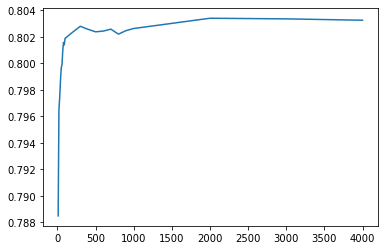

In [41]:
Acc_data = [[],[]]
for i in range(10,100,10):
    model = model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=i,max_depth=10, min_samples_leaf=1, random_state=3), 'rf_temp', X_train, Y_train, X_test, Y_test)
    Acc_data[0].append(i)
    Acc_data[1].append(model['r2'])

for i in range(100,1000,100):
    model = model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=i,max_depth=10, min_samples_leaf=1, random_state=3), 'rf_temp', X_train, Y_train, X_test, Y_test)
    Acc_data[0].append(i)
    Acc_data[1].append(model['r2'])

for i in range(1000,5000,1000):
    model = model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=i,max_depth=10, min_samples_leaf=1, random_state=3), 'rf_temp', X_train, Y_train, X_test, Y_test)
    Acc_data[0].append(i)
    Acc_data[1].append(model['r2'])

plt.plot(Acc_data[0], Acc_data[1])
peak_acc = max(Acc_data[1])
peak_ne = Acc_data[0][Acc_data[1].index(peak_acc)]
print('Maximum Accuracy of ',peak_acc,' when n_estimators is ',peak_ne)

#### Hyper-parameter Tuning (max_depth)

Maximum Accuracy of  0.8180021289656763  when max_depth is  30


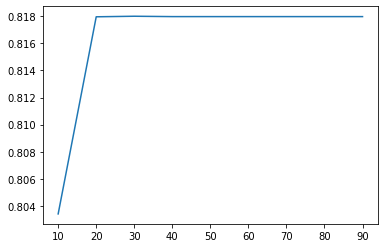

In [42]:
Acc_data = [[],[]]
for i in range(10,100,10):
    model = model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=2000,max_depth=i, min_samples_leaf=1, random_state=3), 'rf_temp', X_train, Y_train, X_test, Y_test)
    Acc_data[0].append(i)
    Acc_data[1].append(model['r2'])

plt.plot(Acc_data[0], Acc_data[1])
peak_acc = max(Acc_data[1])
peak_md = Acc_data[0][Acc_data[1].index(peak_acc)]
print('Maximum Accuracy of ',peak_acc,' when max_depth is ',peak_md)

#### Hyper-parameter Tuning (min_samples_leaf)

Maximum Accuracy of  0.8180021289656763  when min_samples_leaf is  1


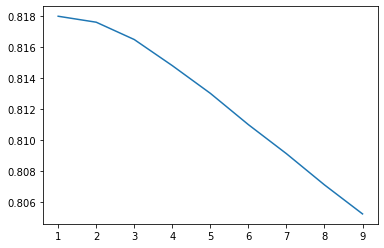

In [43]:
Acc_data = [[],[]]
for i in range(1,10,1):
    model = model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=2000,max_depth=30, min_samples_leaf=i, random_state=3), 'rf_temp', X_train, Y_train, X_test, Y_test)
    Acc_data[0].append(i)
    Acc_data[1].append(model['r2'])

plt.plot(Acc_data[0], Acc_data[1])
peak_acc = max(Acc_data[1])
peak_msl = Acc_data[0][Acc_data[1].index(peak_acc)]
print('Maximum Accuracy of ',peak_acc,' when min_samples_leaf is ',peak_msl)

In [195]:
model_list.append(model_train(RandomForestRegressor(criterion='squared_error',n_jobs=3, n_estimators=2000,max_depth=30, min_samples_leaf=1, random_state=3), 'Random Forest Regressor', X_train, Y_train, X_test, Y_test))
print(model_list[1])

{'Model Name': 'Random Forest Regressor', 'Model': RandomForestRegressor(max_depth=30, n_estimators=2000, n_jobs=3, random_state=3), 'Mean Squre Error': 36392128651.826, 'Root Mean Squre Error': 190767.21063072133, 'R2 Score': 0.8169965191286543}


### Decision Tree Regressor

In [38]:
parameters={"min_samples_split": [2,3,4,5,6,7],
            "max_depth": [12,14,16],
            "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
            "max_leaf_nodes": [100,200,300],
            }

tuning_model=GridSearchCV(DecisionTreeRegressor(criterion='squared_error', random_state=3),param_grid=parameters,cv=3,verbose=3)
tuning_model.fit(X_train, Y_train)
tuning_model.best_params_

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[CV 1/3] END max_depth=12, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=2;, score=0.716 total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=2;, score=0.722 total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=2;, score=0.704 total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=3;, score=0.716 total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=3;, score=0.722 total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=3;, score=0.712 total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=4;, score=0.713 total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=4;, score=0

{'max_depth': 14,
 'max_leaf_nodes': 200,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [196]:
model_list.append(model_train(DecisionTreeRegressor(criterion='squared_error', max_depth=14, max_leaf_nodes=200, min_samples_leaf=8, min_samples_split=2,random_state=3), 'Decision Tree Regressor', X_train, Y_train, X_test, Y_test))
print(model_list[2])

{'Model Name': 'Decision Tree Regressor', 'Model': DecisionTreeRegressor(max_depth=14, max_leaf_nodes=200, min_samples_leaf=8,
                      random_state=3), 'Mean Squre Error': 52295482905.123924, 'Root Mean Squre Error': 228682.05636893318, 'R2 Score': 0.73702402799663}


# Select Best Model

In [79]:
model_list_df = pd.DataFrame(model_list)
model_list_df.drop(labels='Model', axis=1, inplace=True)
model_list_df 

,Model Name,Mean Squre Error,Root Mean Squre Error,R2 Score
0,Logistic Regression,8.055428e+10,283820.864989,0.594920
1,Random Forest Regressor,3.639213e+10,190767.210631,0.816997
2,Decision Tree Regressor,5.229548e+10,228682.056369,0.737024


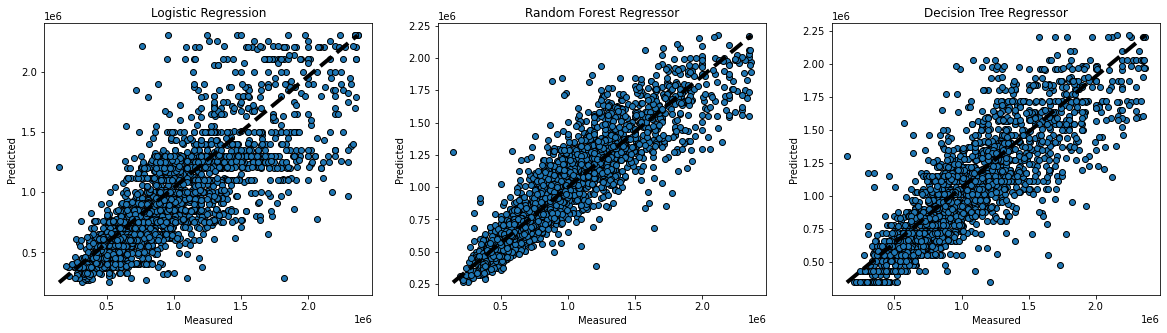

In [202]:
fig, axes = plt.subplots(1,len(model_list),figsize=(20,5))
for i,t in enumerate(model_list):
    Y_pred = t['Model'].predict(X_test)
    axes[i].scatter(Y_test, Y_pred, edgecolors=(0, 0, 0))
    axes[i].plot([Y_test.min(), Y_test.max()], [Y_pred.min(), Y_pred.max()], 'k--', lw=4)
    axes[i].set_xlabel('Measured')
    axes[i].set_ylabel('Predicted')
    axes[i].title.set_text(t['Model Name'])

# Saving Model and Pre-processing Data

In [80]:
if not os.path.exists("Data/Model"):
    os.makedirs("Data/Model")

object_list = [Suburb_LE, Type_LE, Method_LE, scaler, model_list[1]]
open_file = open("Data/Model_Data.pkl", "wb")
pickle.dump(object_list, open_file)
open_file.close()

fs = Filesplit()
def split_cb(f, s):
    print("file: {0}, size: {1}".format(f, s))
fs.split(file="Data/Model_Data.pkl", split_size=50000000, output_dir="Data/Model", callback=split_cb)
os.remove("Data/Model_Data.pkl")

file: Data/Model\Model_Data_1.pkl, size: 50000000
file: Data/Model\Model_Data_2.pkl, size: 50000000
file: Data/Model\Model_Data_3.pkl, size: 50000000
file: Data/Model\Model_Data_4.pkl, size: 50000000
file: Data/Model\Model_Data_5.pkl, size: 50000000
file: Data/Model\Model_Data_6.pkl, size: 50000000
file: Data/Model\Model_Data_7.pkl, size: 50000000
file: Data/Model\Model_Data_8.pkl, size: 50000000
file: Data/Model\Model_Data_9.pkl, size: 50000000
file: Data/Model\Model_Data_10.pkl, size: 50000000
file: Data/Model\Model_Data_11.pkl, size: 50000000
file: Data/Model\Model_Data_12.pkl, size: 50000000
file: Data/Model\Model_Data_13.pkl, size: 50000000
file: Data/Model\Model_Data_14.pkl, size: 50000000
file: Data/Model\Model_Data_15.pkl, size: 50000000
file: Data/Model\Model_Data_16.pkl, size: 50000000
file: Data/Model\Model_Data_17.pkl, size: 50000000
file: Data/Model\Model_Data_18.pkl, size: 50000000
file: Data/Model\Model_Data_19.pkl, size: 38313936


# Model Inference

In [82]:
def merge_cb(f, s):
    print("file: {0}, size: {1}".format(f, s))

fs.merge(input_dir="Data/Model", output_file="Data/Model_Data.pkl", callback=merge_cb)
open_file_ = open("Data/Model_Data.pkl", "rb")
object_list_ = pickle.load(open_file_)
open_file_.close()
os.remove("Data/Model_Data.pkl")

Suburb_LE_ = object_list_[0]
Type_LE_ = object_list_[1]
Method_LE_ = object_list_[2]
scaler_ = object_list_[3]
model_ = object_list_[4]


file: Data/Model_Data.pkl, size: 938313936


In [135]:
def preprocess(X_Data):
    key = ['Distance','Bedrooms','Bathroom','Car','BuildingArea','Lattitude','Longtitude','Age','Type_LE','Method_LE','Suburb_LE']
    in_data = X_Data
    today = datetime.datetime.now()

    in_data['Age'] = today.year - in_data['YearBuilt']
    in_data['Type_LE'] = Type_LE.transform([in_data['Type']])[0]
    in_data['Method_LE'] = Method_LE.transform([in_data['Method']])[0]
    in_data['Suburb_LE'] = Suburb_LE.transform([in_data['Suburb']])[0]
    X_ = []
    for i in key:
        X_.append( in_data[i])
    X_ = scaler_.transform(X_)
    return [X_]


In [137]:
in_data = { 'Suburb': 'Airport West',
            'Bedrooms': 4,
            'Type': 'h',
            'Method': 'SP',
            'Distance': 2.5,
            'Bathroom': 2,
            'Car': 2,
            'BuildingArea': 128.0,
            'Lattitude': -37.8022,
            'Longtitude': 144.9954,
            'YearBuilt': 2005}

predicted_price = model_['Model'].predict(preprocess(in_data))
predicted_price[0]

1776333.125